In [3]:
import pandas as pd
balanced_data = pd.read_csv("balanced_data.csv")
# Features und Ziel
X = balanced_data.drop(columns='target')
Y = balanced_data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=22)

In [8]:
def plot_grid_search_2d(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
# Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax.plot(grid_param_2, scores_mean[idx,:], '-o', label= name_param_1 + ': ' + str(val))
        ax.set_title("Grid Search Scores", fontsize=12, fontweight='bold')
        ax.set_xlabel(name_param_2, fontsize=10)
        ax.set_ylabel('CV Average Validation Accuracy', fontsize=10)
        ax.legend(loc="best", fontsize=8)
        ax.grid('on')

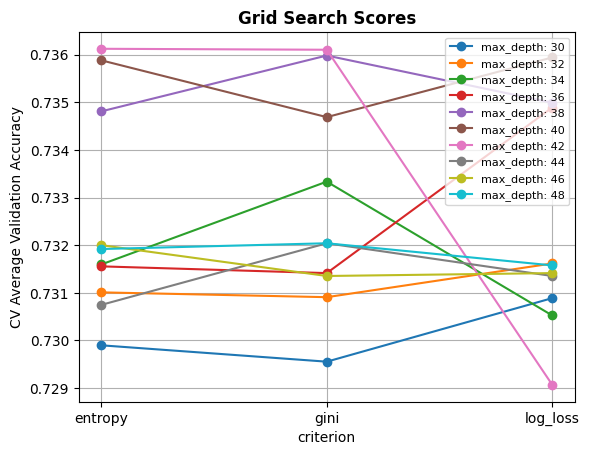

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

etmodel = DecisionTreeClassifier()
param_grid = [
     {'max_depth': range(30, 50, 2),
      'criterion': ['entropy', 'gini',"log_loss"]}
]
skf = StratifiedKFold(n_splits=10, shuffle=True)
CV_etmodel = GridSearchCV(estimator=etmodel, 
                          param_grid=param_grid, 
                          cv=10, 
                          scoring='accuracy')
CV_etmodel.fit(X_train, Y_train)

plot_grid_search_2d(CV_etmodel.cv_results_, param_grid[0]['max_depth'], param_grid[0]['criterion'], 'max_depth', 'criterion')


In [29]:
etmodel = etmodel.set_params(**CV_etmodel.best_params_)
etmodel.fit(X_train, Y_train)
prediction = etmodel.predict(X_test)
etmodel.score(X_test, Y_test)


0.7462626262626263